In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
train.shape

(1460, 81)

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

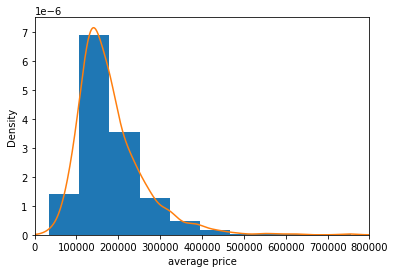

In [9]:
import matplotlib.pyplot as plt
# plt.hist(train['SalePrice'])
fig,ax = plt.subplots(figsize=(6,4))
train['SalePrice'].plot(kind='hist',density=True)
train['SalePrice'].plot(kind = 'kde')
ax.set_xlabel("average price")
ax.set_xlim(0,800000)
plt.show()

In [10]:
print(f"skewness:{train['SalePrice'].skew()}")
print(f"kurtosis:{train['SalePrice'].kurt()}")

skewness:1.8828757597682129
kurtosis:6.536281860064529


<AxesSubplot:>

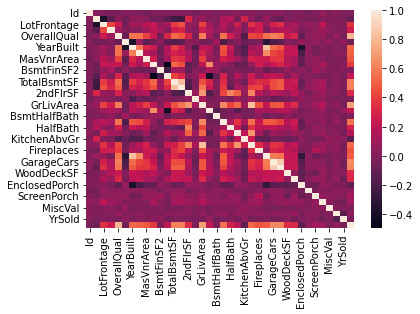

In [11]:
import seaborn as sns
sns.heatmap(train.corr())

In [12]:


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [13]:
numerical_cols = []
for col in train.columns:
    if (train.dtypes[col] == np.int64)or(train.dtypes[col] == np.float64):
        numerical_cols.append(col)

In [14]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [15]:
import seaborn as sns
# sns.heatmap(train[numerical_cols].apply(lambda x: x.corr(train['SalePrice'])))
corelations = pd.DataFrame(train[numerical_cols].apply(lambda x: x.corr(train['SalePrice'])))


In [16]:
corelations.rename(columns={0:'corr_val'},inplace=True)

In [17]:
corelations['variables'] = corelations.index
corelations.reset_index(inplace = True)

In [18]:
corelations.drop(['index'],axis=1,inplace=True)
corelations.head()

,corr_val,variables
0,-0.021917,Id
1,-0.084284,MSSubClass
2,0.351799,LotFrontage
3,0.263843,LotArea
4,0.790982,OverallQual


In [19]:
corelations.head()

,corr_val,variables
0,-0.021917,Id
1,-0.084284,MSSubClass
2,0.351799,LotFrontage
3,0.263843,LotArea
4,0.790982,OverallQual


In [20]:
corelations.iloc[0,:]['corr_val']

-0.021916719443431116

In [21]:
# columns having correlation more than 0.5 with 'SalesPrice'

highly_correlated_columns = []
for i in range(0,corelations.shape[0]):
    if corelations.iloc[i,:]['corr_val']>0.5:
                             highly_correlated_columns.append(corelations.iloc[i,:]['variables'])

In [22]:
highly_correlated_columns

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

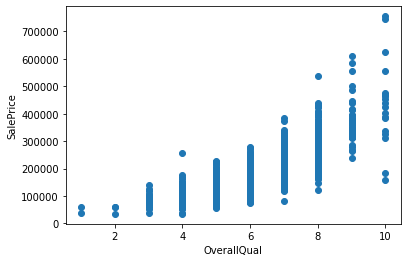

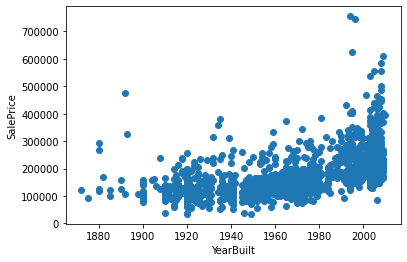

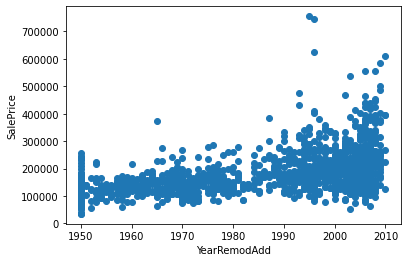

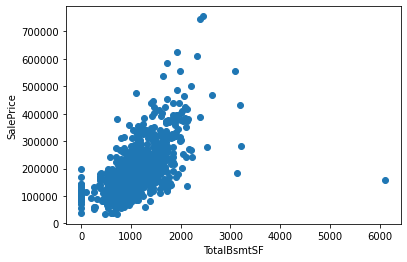

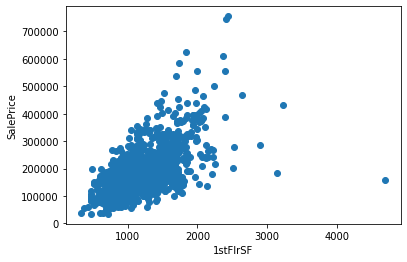

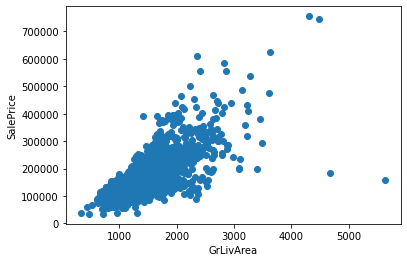

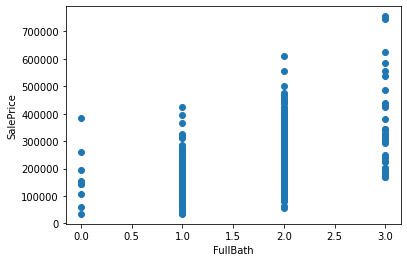

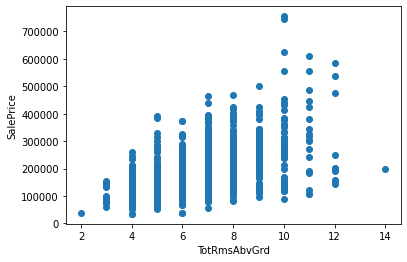

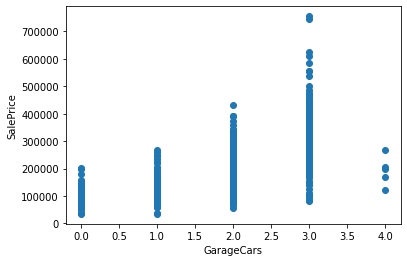

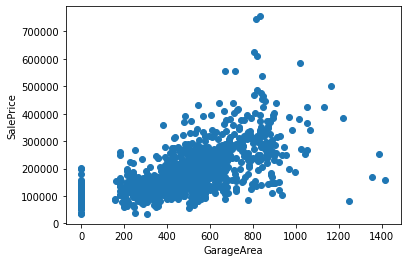

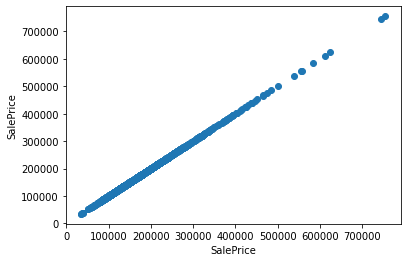

In [23]:
# visually see the co-relation
for i in range(len(highly_correlated_columns)):
    plt.scatter(train[highly_correlated_columns[i]],train['SalePrice'])
#     plt.plot(train[highly_correlated_columns[i]],train['SalePrice'])
    plt.xlabel(highly_correlated_columns[i])
    plt.ylabel("SalePrice")
    plt.show()

In [24]:
# categorical_cols = []
# for col in train.columns:
#     if (train.dtypes[col] == np.O):
#         numerical_cols.append(col)
# categorical_cols 

In [25]:
categorical_data = train.select_dtypes(include=['object'])

In [26]:
type(categorical_data)

pandas.core.frame.DataFrame

In [27]:
categorical_cols  = categorical_data.columns
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [29]:
train['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

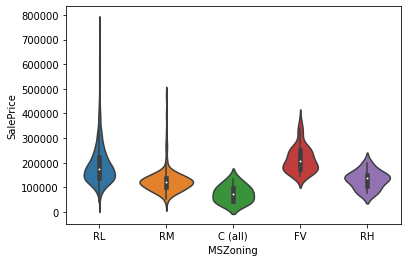

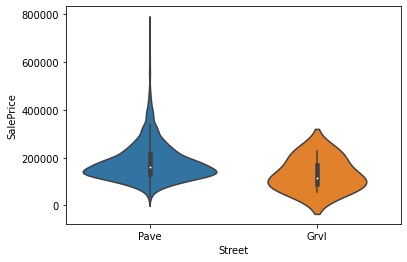

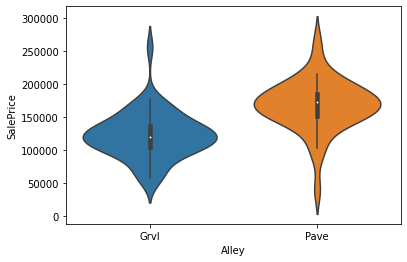

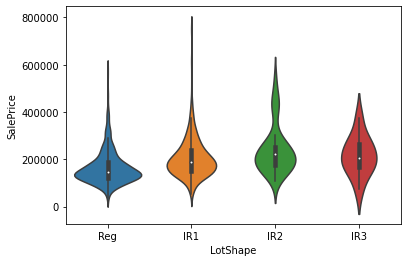

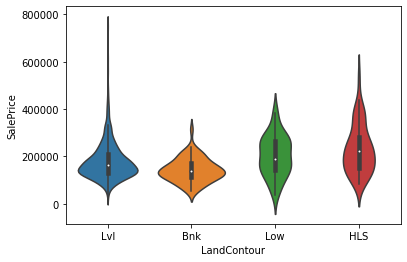

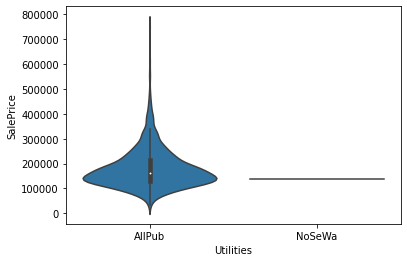

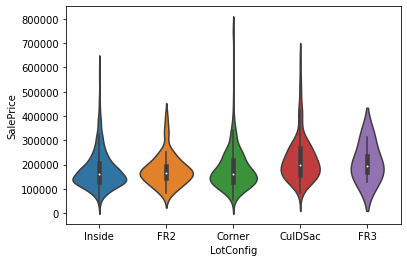

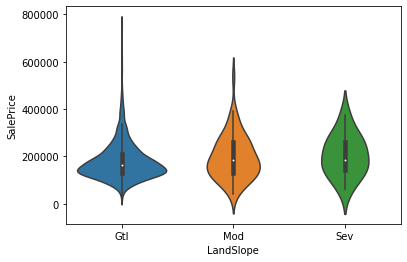

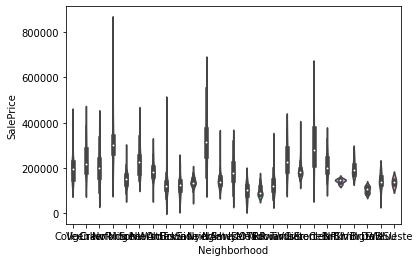

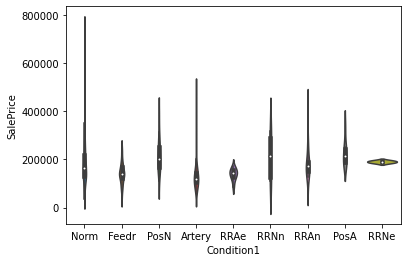

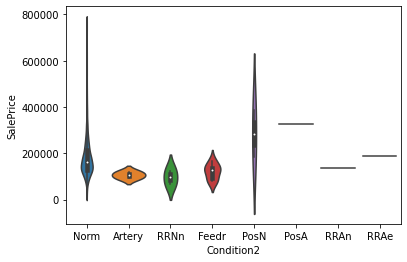

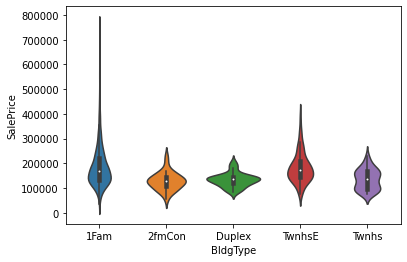

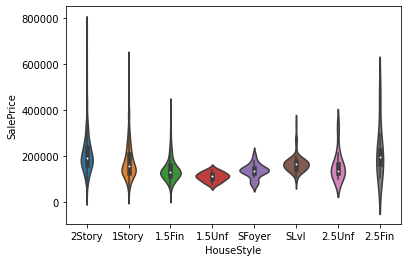

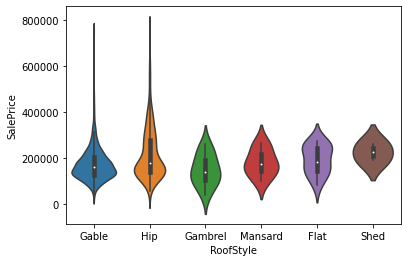

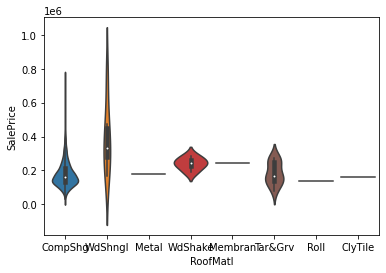

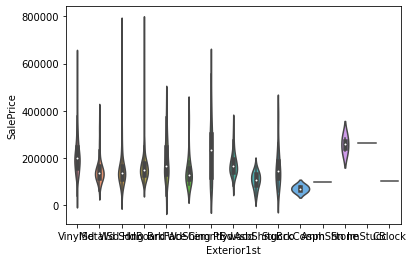

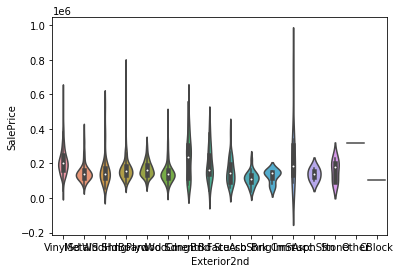

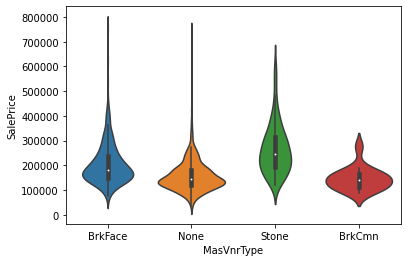

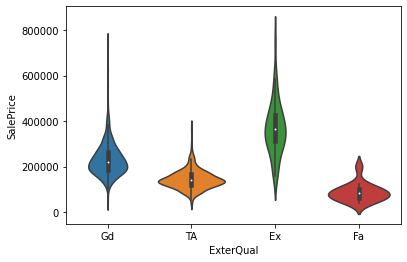

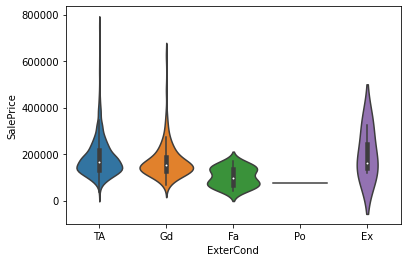

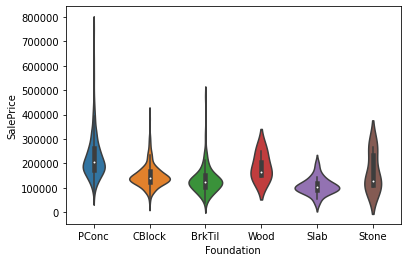

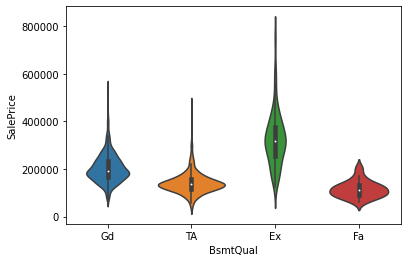

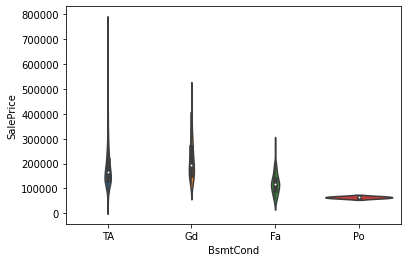

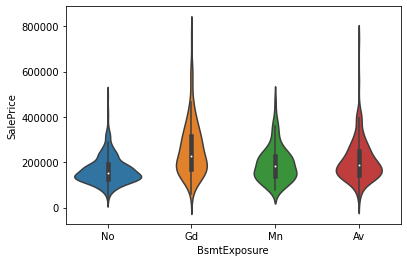

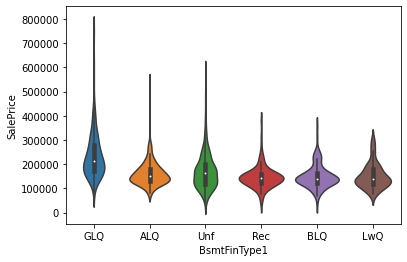

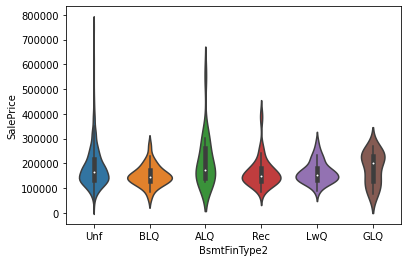

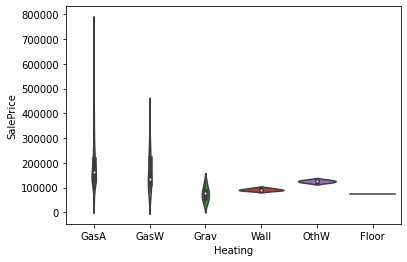

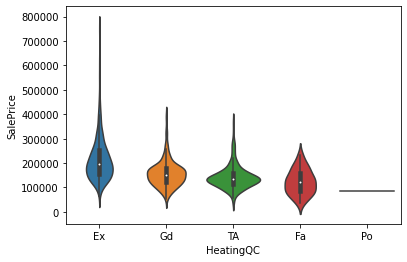

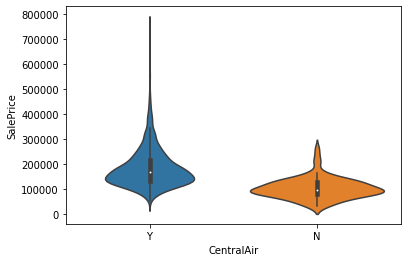

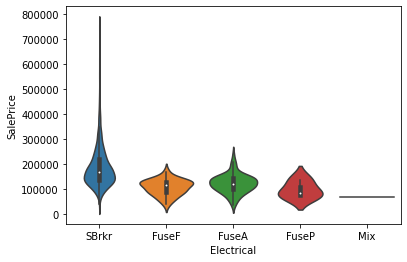

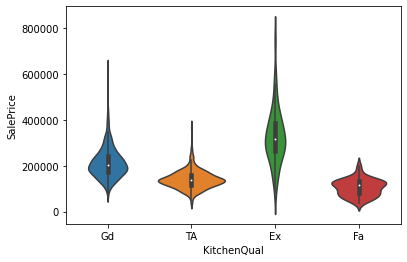

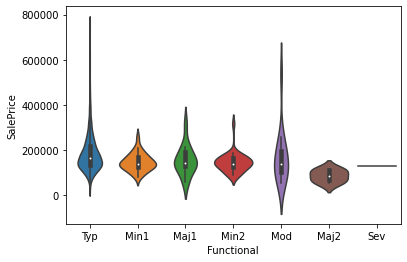

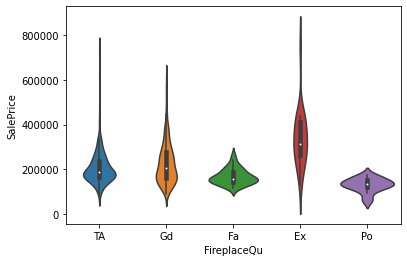

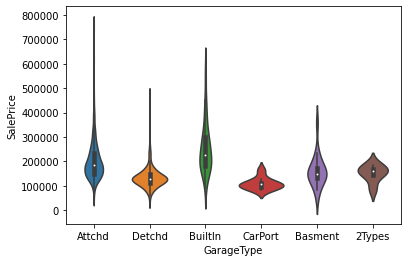

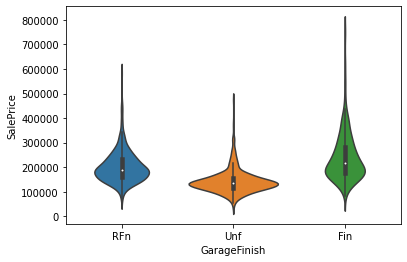

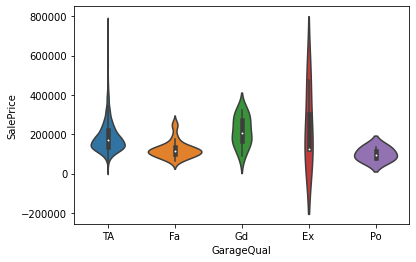

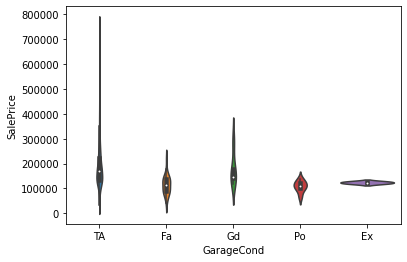

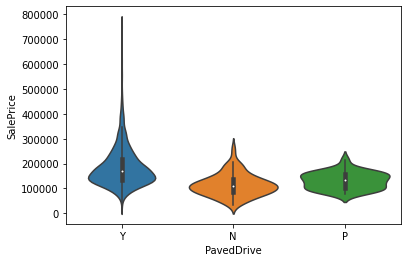

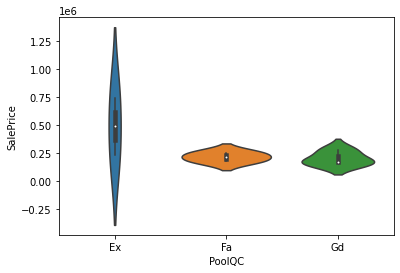

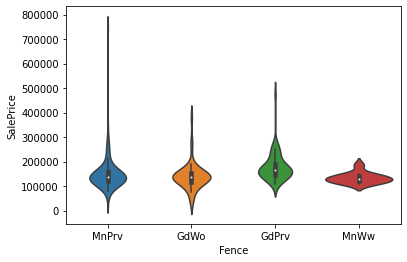

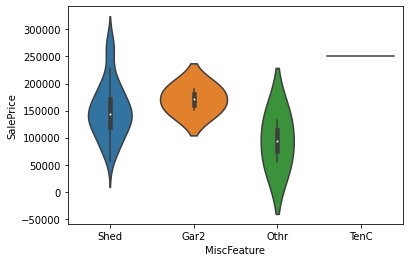

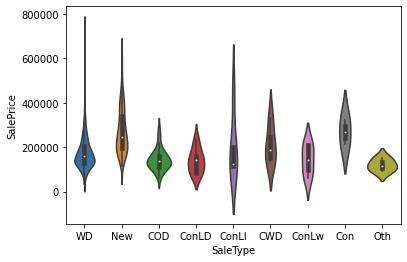

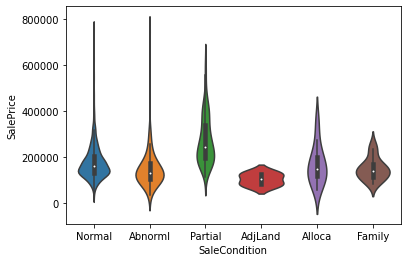

In [30]:
for col in categorical_cols:
    ax = sns.violinplot(x=col, y='SalePrice', data=train)
    plt.show()

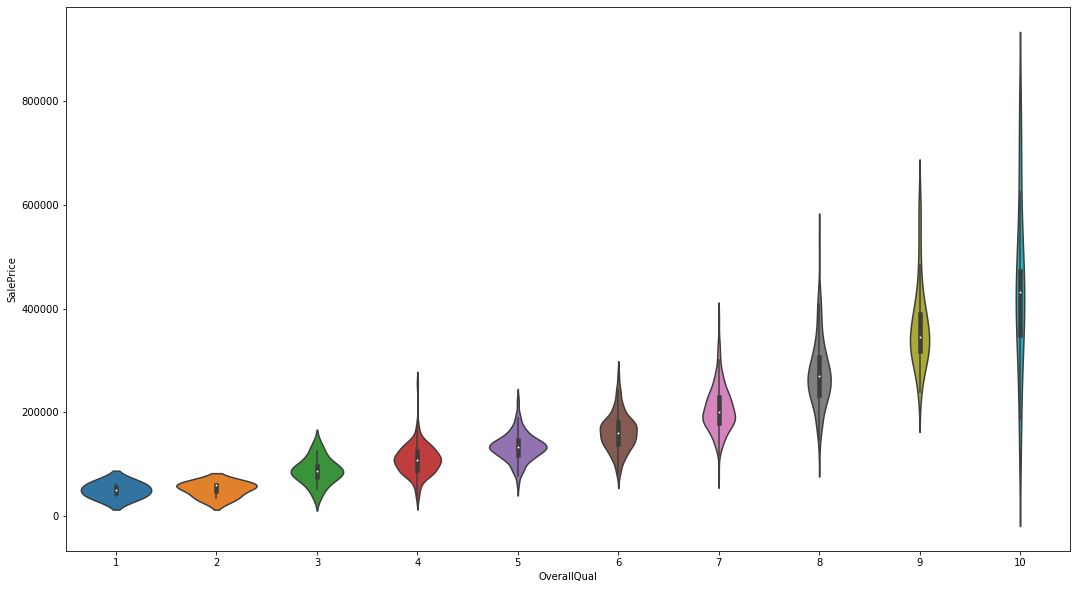

In [31]:
fig,ax = plt.subplots(figsize=(18,10))
ax = sns.violinplot(x='OverallQual', y='SalePrice', data=train)
plt.show()

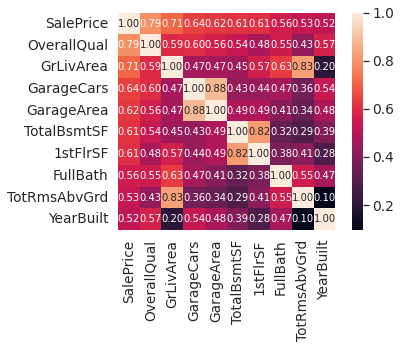

In [32]:
#saleprice correlation matrix
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
# garagex,totalbsmt,1stFlrSF =>multicolinearity may exist because of high
# corelation between the abive the columns

<AxesSubplot:>

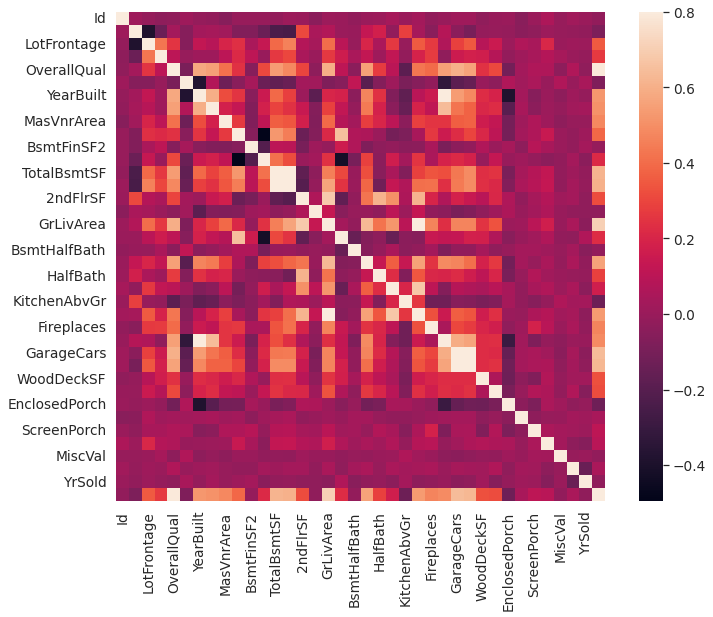

In [34]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


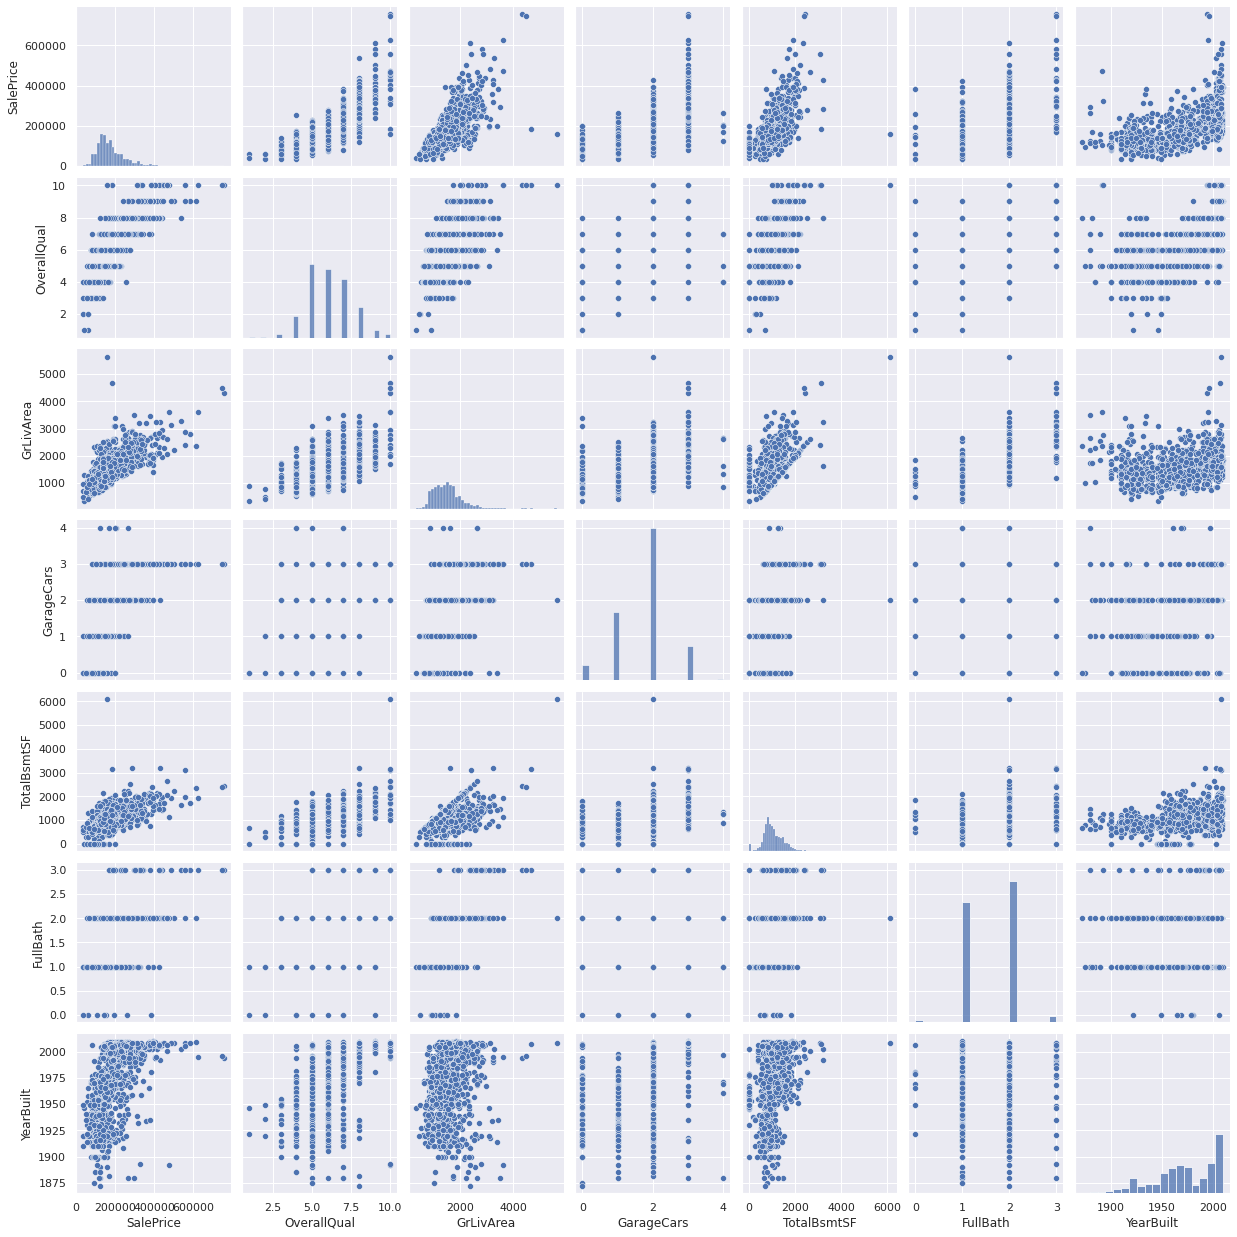

In [35]:
# copied
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height= 2.5)
plt.show()

In [36]:
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

In [37]:
 total = train.isnull().sum().sort_values(ascending=False)

In [38]:
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head(30)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


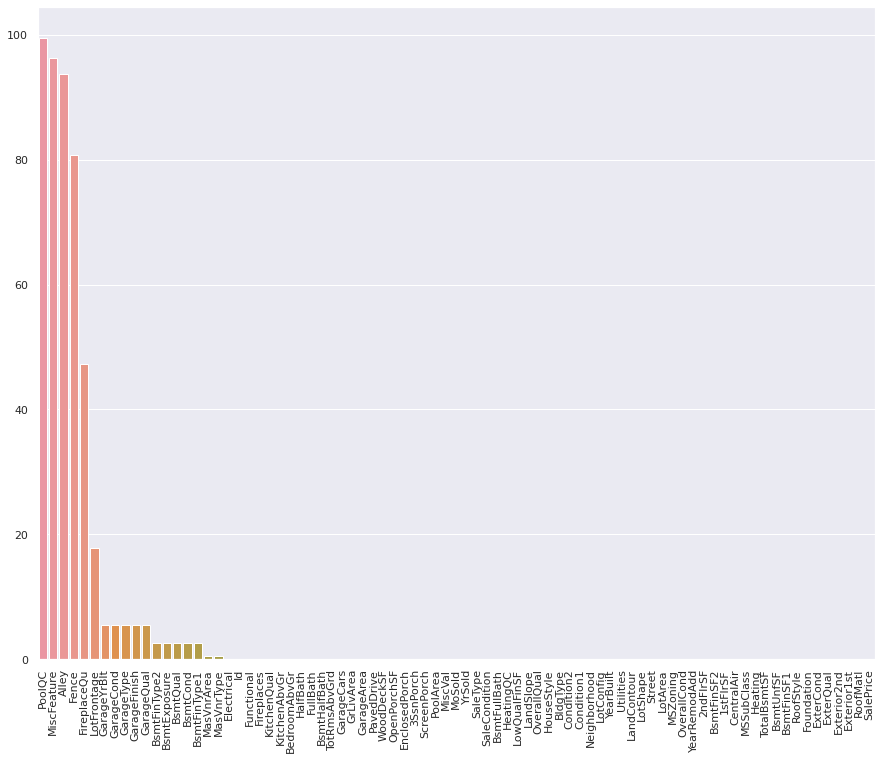

In [39]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(15,12))
sns.barplot(x=missing_data.index,y=percent*100)
plt.xticks(rotation=90)
plt.show()

In [40]:
# we will drop the variable if it has more than 15% of the data missing
# and of we see carefully the variables with the highest number of missing variables like 
# PoolQC ,MiscFeature,Alley these are factors that people don't usually consider while 
# buying a house so we can easily drop them
# Among GarageX variables GarageCars is the most important variable of all and luckily it
# doesn't have any missing values and so we can easily drop the other GarageX variables
# present.
# SAme goes for the BsmtX variables ,the most important among these are TotalBsmtSF hence
# we will drop the rest as they not very and important plus they contain missing values

In [41]:
missing_data.reset_index(inplace=True)

In [42]:
missing_data

,index,Total,Percent
0,PoolQC,1453,0.995205
1,MiscFeature,1406,0.963014
2,Alley,1369,0.937671
3,Fence,1179,0.807534
4,FireplaceQu,690,0.472603
...,...,...,...
76,ExterQual,0,0.000000
77,Exterior2nd,0,0.000000
78,Exterior1st,0,0.000000
79,RoofMatl,0,0.000000


In [43]:
columns_more_than_one_missing = []
for i in range(missing_data.shape[0]):
    if(missing_data.iloc[i,:]['Total']>1):
        columns_more_than_one_missing.append(missing_data.iloc[i,:]['index'])

In [44]:
columns_more_than_one_missing

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrArea',
 'MasVnrType']

In [45]:
missing_data.shape

(81, 3)

In [46]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
# train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(columns=columns_more_than_one_missing,axis=1)


In [48]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [49]:
train.shape

(1459, 63)

In [50]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

**DEALING WITH OUTLIERS**

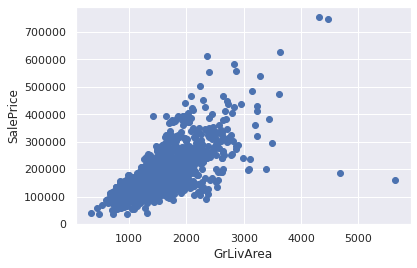

In [51]:
plt.scatter(train['GrLivArea'],train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

Let us remove the outliers on the extreme bottom right because for very large area the price is too low which is not somethign we expect should happen!

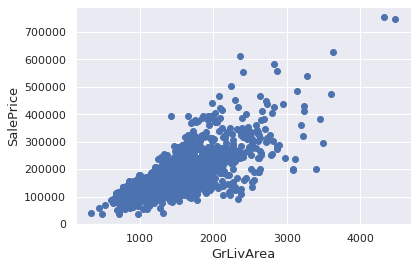

In [52]:
# after dropping the outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

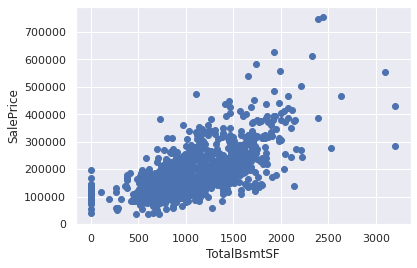

In [53]:
plt.scatter(train['TotalBsmtSF'],train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

for 'TotalBsmtSF' we don't have any serious outliers like the ones for 'GrLivArea'hence we won't we dropping anything just one thing to keep in mind is that for 'TotalBsmtSF' we have 
a number of houses with 0 basement area which will create a problem if we plan to log scale this variable so that is something to keep in mind .

In [54]:
# WE should have joined the test and train data before starting feature engineering 
# but before scaling the data let us perform the feature engineering we have performed on 
# train data on test data now and the proceed without scaling and handling the categorical variables

In [55]:
print(train.shape)
print(test.shape)

(1457, 63)
(1459, 80)


In [56]:
test.isnull().sum().sort_values(ascending=False).head(40)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
KitchenAbvGr       0
YrSold             0
TotRmsAbvGrd       0
MoSold             0
Fireplaces         0
dtype: int64

In [57]:
# dropping the columns that we dropped in train data
test = test.drop(columns=columns_more_than_one_missing,axis=1)
test.shape

(1459, 62)

In [58]:
test.isnull().sum().sort_values(ascending=False).head(20)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtUnfSF       1
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
KitchenQual     1
Exterior1st     1
TotalBsmtSF     1
SaleType        1
HalfBath        0
BedroomAbvGr    0
FullBath        0
KitchenAbvGr    0
GrLivArea       0
dtype: int64

filling in the missing values in the  numerical columns with their medians

In [59]:
test = test.fillna(test.median())
test.isnull().sum().sort_values(ascending = False).head(20)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MSZoning        4
Utilities       2
Functional      2
SaleType        1
KitchenQual     1
Exterior1st     1
Exterior2nd     1
Id              0
HalfBath        0
KitchenAbvGr    0
BedroomAbvGr    0
BsmtHalfBath    0
FullBath        0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
TotRmsAbvGrd    0
GarageCars      0
Fireplaces      0
dtype: int64

In [60]:
# filling the missing categorical variables with the most frequently occuring value
test = test.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(test.isnull().sum().sort_values(ascending=False).head(20))
print(test.shape)

Id              0
Functional      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
MSSubClass      0
GarageCars      0
GarageArea      0
PavedDrive      0
dtype: int64
(1459, 62)


In [61]:
print(train.shape)
print(test.shape)

(1457, 63)
(1459, 62)


In [62]:
print(train.columns[1])
print(test.columns[1])
print(train.columns[-2])
print(test.columns[-1])

MSSubClass
MSSubClass
SaleCondition
SaleCondition


skew:Id:0.0008232552602808747
skew:MSSubClass:1.4079751310130098
skew:LotArea:12.569540226467055
skew:OverallQual:0.1995545591608176
skew:OverallCond:0.6900177599487379
skew:YearBuilt:-0.6115990426256526
skew:YearRemodAdd:-0.50090042235795
skew:BsmtFinSF1:0.7639637767238653
skew:BsmtFinSF2:4.250256422514535
skew:BsmtUnfSF:0.9199455351813938
skew:TotalBsmtSF:0.5124557702781061
skew:1stFlrSF:0.887058953197424
skew:2ndFlrSF:0.8142426347825529
skew:LowQualFinSF:9.001760189111751
skew:GrLivArea:1.010236026657094
skew:BsmtFullBath:0.589253742945099
skew:BsmtHalfBath:4.098468853479979
skew:FullBath:0.03257260422591887
skew:HalfBath:0.6821346748639141
skew:BedroomAbvGr:0.21259304740496177
skew:KitchenAbvGr:4.48312500997774
skew:TotRmsAbvGrd:0.6609427611729347
skew:Fireplaces:0.6310640490579575


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


skew:GarageCars:-0.3416701801348417
skew:GarageArea:0.13104566773504406
skew:WoodDeckSF:1.5453768044518243
skew:OpenPorchSF:2.3390207489717967
skew:EnclosedPorch:3.0858090848677326
skew:3SsnPorch:10.293486658188012
skew:ScreenPorch:4.117285249207043
skew:PoolArea:15.943421721601927
skew:MiscVal:24.451726096732976
skew:MoSold:0.21448266361467508
skew:YrSold:0.09567242919482084
skew:SalePrice:1.8803628919012763


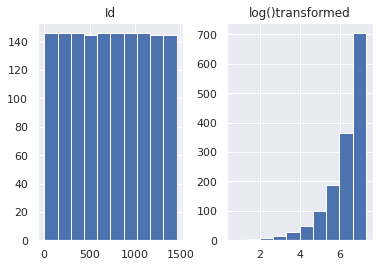

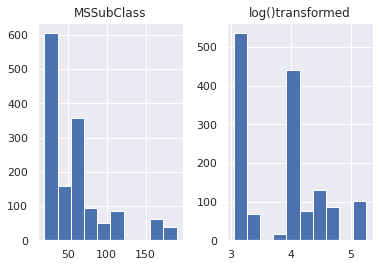

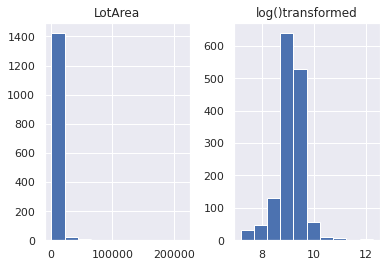

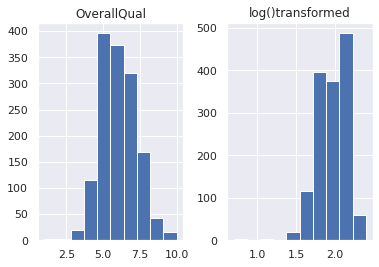

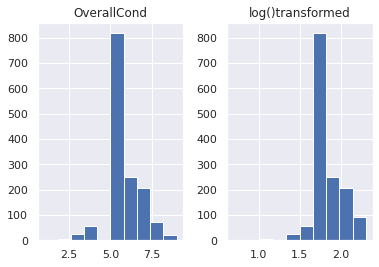

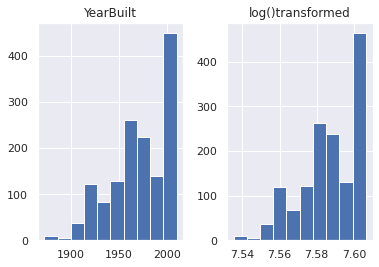

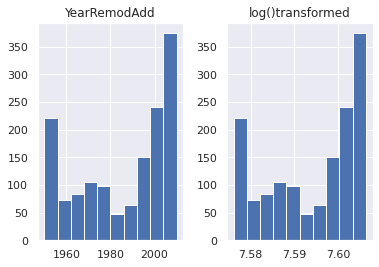

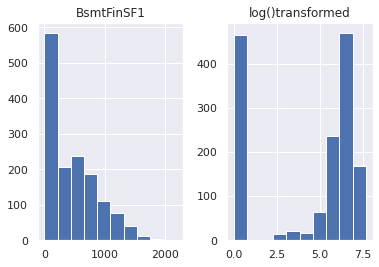

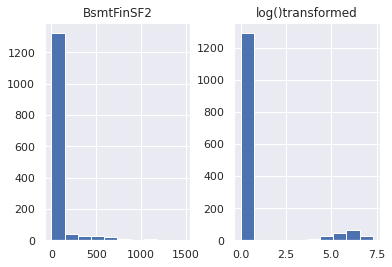

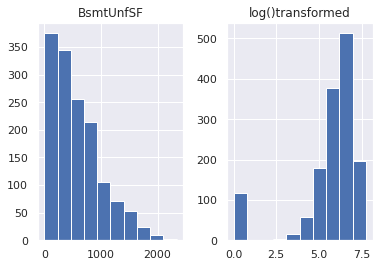

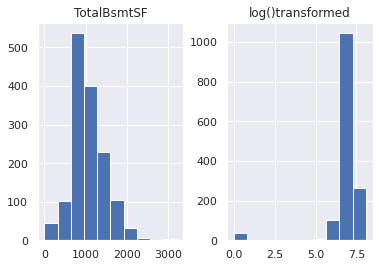

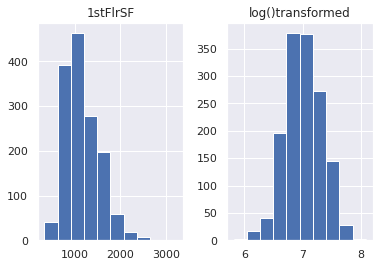

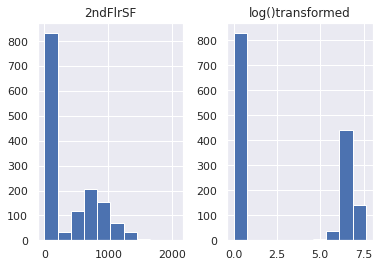

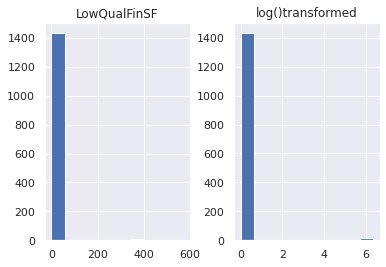

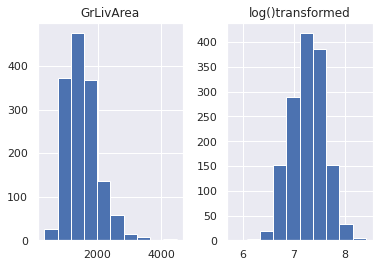

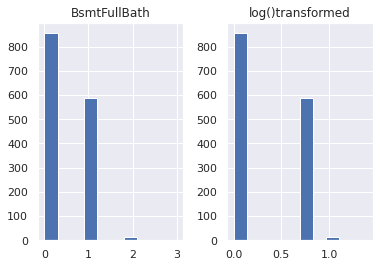

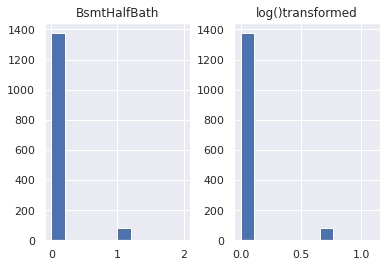

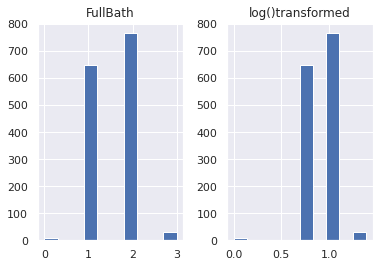

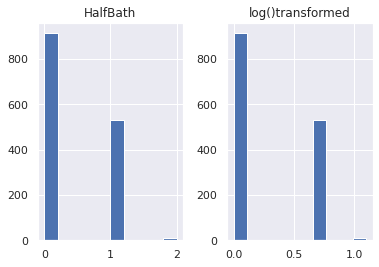

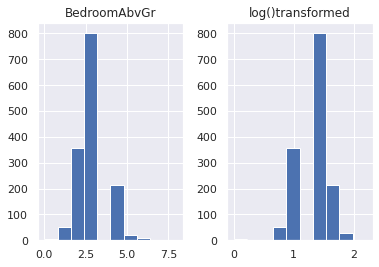

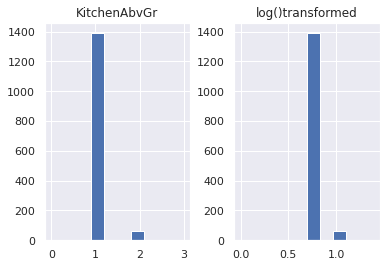

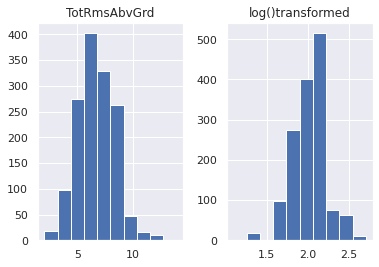

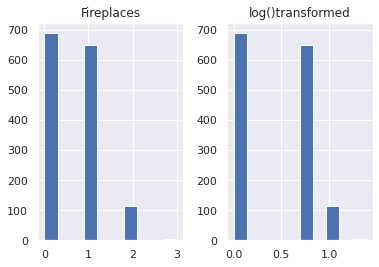

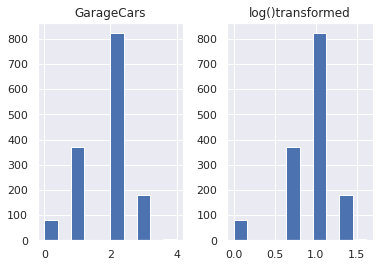

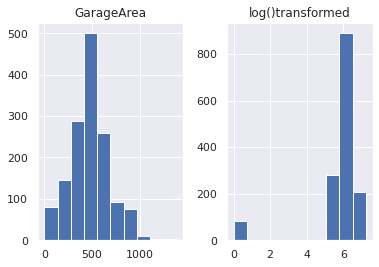

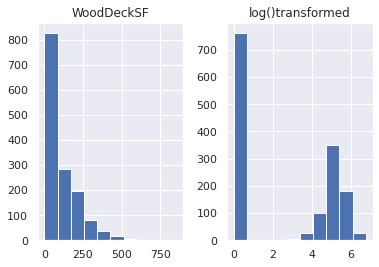

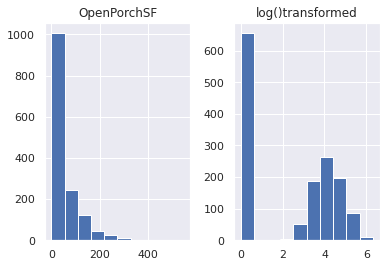

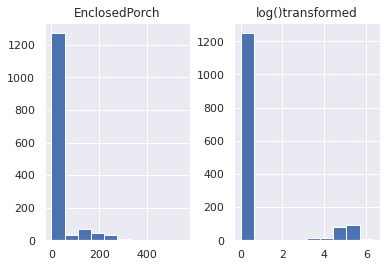

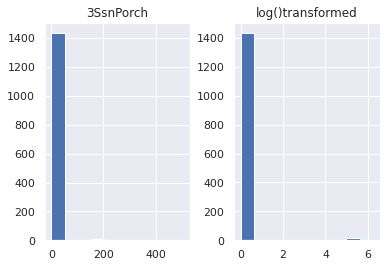

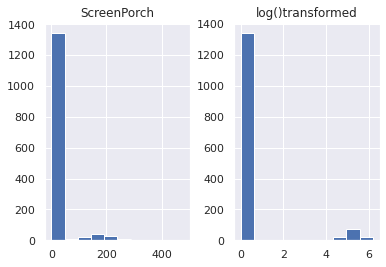

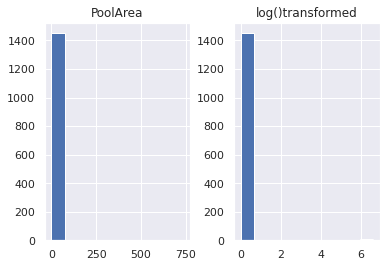

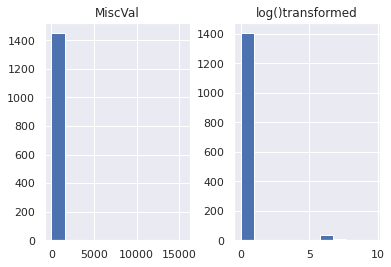

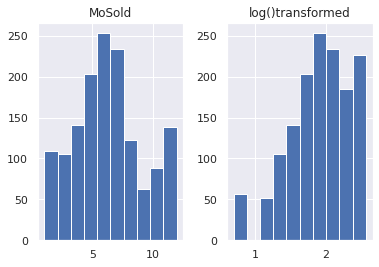

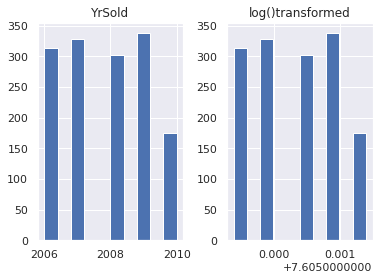

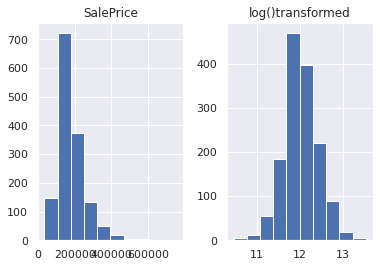

In [63]:
for col in numerical_cols:
    if col in train.columns:
        col_notnormal_normal = pd.DataFrame({col:train[col], "log()transformed":np.log1p(train[col])})
        col_notnormal_normal.hist()
        print("skew:"+col+":"+str(train[col].skew()))

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'log(price + 1)'}>]], dtype=object)

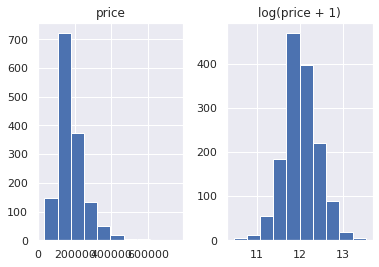

In [64]:
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()


In [65]:
type(train.iloc[:,1:-1])

pandas.core.frame.DataFrame

In [66]:
print(train.shape)
print(test.shape)

(1457, 63)
(1459, 62)


In [67]:
# data = pd.concat(train.iloc[:,1:-1],test.iloc[:,1:])
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
print(data.shape)
print(data.head())

(2916, 61)
   MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0    Inside       Gtl      CollgCr  ...          61             0         0   
1       FR2       Gtl      Veenker  ...           0             0         0   
2    Inside       Gtl      CollgCr  ...          42             0         0   
3    Corner       Gtl      Crawfor  ...          35           272         0   
4       FR2       Gtl      NoRidge  ...          84             0         0   

  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  
0

In [68]:
# perform log transformation on those columns that have skewness more than 0.75
for col in numerical_cols:
    if col in data.columns:
        if(data[col].skew() > 0.75):
            data[col] = np.log1p(data[col])

In [69]:
train["SalePrice"] = np.log1p(train["SalePrice"])

(array([6.800e+01, 1.010e+02, 2.620e+02, 1.282e+03, 1.047e+03, 1.210e+02,
        1.900e+01, 1.200e+01, 1.000e+00, 3.000e+00]),
 array([ 7.17088848,  7.68175331,  8.19261815,  8.70348299,  9.21434782,
         9.72521266, 10.23607749, 10.74694233, 11.25780717, 11.768672  ,
        12.27953684]),
 <BarContainer object of 10 artists>)

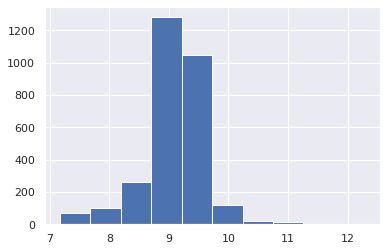

In [70]:
plt.hist(data['LotArea'])

handling categorical values

In [71]:
data = pd.get_dummies(data)

In [72]:
data.shape

(2916, 219)

In [73]:
X = data[:train.shape[0]]
X_new_test =  data[train.shape[0]:]
y = train.SalePrice

In [74]:
print(train.shape)
print(test.shape)

(1457, 63)
(1459, 62)


In [75]:
print(X.shape)
print(X_new_test.shape)

(1457, 219)
(1459, 219)


In [76]:
# split data and test different regressors on validation data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=18)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=14).fit(X_train, y_train)
data_predicted = ridge.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0107


In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=False, random_state=2, n_jobs=-1).fit(X_train, y_train.ravel())

data_predicted = rf.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0165


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=400).fit(X_train, y_train.ravel())
data_predicted = gbr.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)

MSE: 0.0125


In [80]:
from xgboost import XGBRegressor
xb = XGBRegressor(n_estimators=400).fit(X_train, y_train.ravel())

data_predicted = xb.predict(X_test)
mse = mean_squared_error(y_test, data_predicted)
print("MSE: %.4f" % mse)


MSE: 0.0176


In [81]:
# Ridge Regression seems to working the best so we will train the entire training data on it

In [82]:
ridge_on_full_data = Ridge(alpha=14).fit(X, y)

In [83]:
test_preds = ridge_on_full_data.predict(X_new_test)

In [84]:
xb_on_full_data = XGBRegressor(n_estimators=400).fit(X, y.ravel())

In [85]:
test_preds_2 = xb_on_full_data.predict(X_new_test)

In [86]:
test.shape

(1459, 62)

In [87]:
test_preds.shape

(1459,)

In [88]:
output = pd.DataFrame({'Id': test.Id,
                      'SalePrice': test_preds})
output.to_csv('submission1.csv', index=False)